In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

In [15]:
dis_eq      = np.linspace(1.0,5,30)
dis_st      = np.linspace(5.1,10,10)
distances   = np.concatenate((dis_eq, dis_st))
energy  = []

for d in distances:
    a = d/2
    Za, Zb = 1,1
    pol = 2

    #Set up grid
    NP = 7
    NM = [6,6]
    L = np.arccosh(10/a)
    loc = np.array(range(-4,5)) #Stencil outline
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()


    # ALPHA FRAGMENT
    Nmo_a = [[1,0]]; Nmo_A = [[1,0]]
    N_a   = [[0,0]]; N_A   = [[1,0]]
    nu_a = 0.5

    #Fragment b electrons
    Nmo_b = [[1,0]]; Nmo_B = [[1,0]]
    N_b   = [[0,0]]; N_B   = [[1,0]] 
    nu_b = 0.5

    #Molecular elctron configuration
    Nmo_m = [[1,0]]
    N_m   = [[1,0]]


    part = Partition(grid, Za, Zb, pol, [Nmo_a, Nmo_A], [N_a, N_A], nu_a, [Nmo_b, Nmo_B], [N_b, N_B], nu_b, {  "AB_SYM"            : True,
                                                                                                               "interaction_type"  : "dft", 
                                                                                                               "kinetic_part_type" : "libxcke",
                                                                                                               "hxc_part_type"     : "overlap_hxc",
                                                                                                               "k_family"          : "gga", 
                                                                                                               "ke_func_id"        : 500,
                                                                                                                })

    #Setup inverter object
    mol_solver = Pssolver(grid, Nmo_m, N_m)
    part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True, 
                                                  "use_iterative"  : False,
                                                  "invert_type"    : "wuyang",
                                                  "DISP"           : False,  
                                                })

    part.optPartition.isolated = True
    part.scf({"disp"  : False,
              "alpha" : [0.6],
              "e_tol" : 1e-6})

    part.optPartition.isolated   = False
    part.scf({"disp"       : False,
              "alpha"      : [0.6],
              "max_iter"   : 20,
              "e_tol"      : 1e-6,
              "iterative"  : False,
              "continuing" : True})
    
    energy.append(part.E.E)
    print(f"Done with {d}")
    
    
energy    = np.array(energy)
np.save('h2plus_distance.npy', distances)
np.save('h2plus_overlap.npy', energy)

Done with 1.0
Done with 1.1379310344827587
Done with 1.2758620689655173
Done with 1.4137931034482758
Done with 1.5517241379310345
Done with 1.6896551724137931
Done with 1.8275862068965516
Done with 1.9655172413793103
Done with 2.103448275862069
Done with 2.2413793103448274
Done with 2.3793103448275863
Done with 2.5172413793103448
Done with 2.655172413793103
Done with 2.793103448275862
Done with 2.9310344827586206
Done with 3.0689655172413794
Done with 3.206896551724138
Done with 3.3448275862068964
Done with 3.4827586206896552
Done with 3.6206896551724137
Done with 3.7586206896551726
Done with 3.896551724137931
Done with 4.0344827586206895
Done with 4.172413793103448
Done with 4.310344827586206
Done with 4.448275862068965
Done with 4.586206896551724
Done with 4.724137931034482
Done with 4.862068965517241
Done with 5.0
Done with 5.1
Done with 5.644444444444444
Done with 6.188888888888888
Done with 6.733333333333333
Done with 7.277777777777778
Done with 7.822222222222222
Done with 8.36666

(-0.12, 0.1)

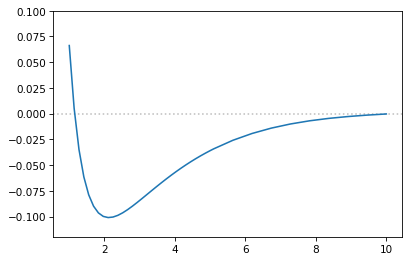

In [16]:
h_energy  = -0.24
energy    = np.array(energy)

fig, ax = plt.subplots(1,1, dpi=75)
ax.axhline(y=0, alpha=0.5, c="grey", ls=":")
ax.plot(distances, energy - 2 * h_energy)
ax.set_ylim(-0.12,0.1)

In [17]:
vars(part.E)

{'Ea': -0.23839575845846386,
 'Eb': -0.23839575845846386,
 'Ef': -0.4767915169169277,
 'Tsf': 0.46587750653737103,
 'Eksf': array([[-0.37429389,  0.        ]]),
 'Enucf': -0.9625159005913222,
 'Exf': -0.25536984224771875,
 'Ecf': -0.02164853638080808,
 'Ehf': 0.2968652557655503,
 'Vhxcf': 0.22837252451633025,
 'Ep': -0.10349823761958396,
 'Ep_pot': -0.10135343217170031,
 'Ep_kin': -0.0009079350434022526,
 'Ep_hxc': -0.0012368704044813956,
 'Et': -0.5802897545365117,
 'Vnn': 0.1,
 'E': -0.4802897545365117,
 'evals_a': array([-6.03888089e-01, -4.50359963e+15, -3.74293890e-01, -4.50359963e+15]),
 'evals_b': array([-6.03888089e-01, -4.50359963e+15, -3.74293890e-01, -4.50359963e+15]),
 'S': 0.008065597391541612,
 'F': 0.018200525433957046,
 'Ehcor': 0.0,
 'Ep_h': -0.12274651926949481,
 'Ep_x': 0.05263018987173346,
 'Ep_c': 0.0021583790094860666}